In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as S
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re
from nltk.corpus import wordnet as wn
nltk.download('wordnet')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nishitsamarth/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nishitsamarth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nishitsamarth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In this section of code we are installing the necessary packages required to perform the sentiment analysis, and the necessary preprocesses to acquire the text data that we are looking to gather from the subreddits from reddit. This information is all in the requirements.txt as well.


In [2]:
! pip install praw
import praw

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
user_agent = "Scraper 1.0 by /u/NoDetective5069"
reddit = praw.Reddit(
    client_id = "ggBGWPlZTGbJWFmr0nyiRw",
    client_secret = "vk_rAmVVOihqxWJDo1AnfyHbEEIXvA",
    user_agent = user_agent,
    check_for_async=False
)

In the two sections of code above we are installing and setting up the web crawler for the subreddits so that way we have a means of extracting the content of the subreddit posts.

In [4]:
headlines_uiuc = []
comments_uiuc = []
for submission in reddit.subreddit('UIUC').hot(limit = 500):
  # print(submission.title, "title")
  comments = []
  for comment in submission.comments:
    # print(comment.body, "body")
    comments.append(comment.body)
  headlines_uiuc.append(submission.title)
  # print(headlines_uiuc, "headline")
  comments_uiuc.append(comments)
  # print(comments_uiuc, "comment")
# print(comments_uiuc, "comments_uiuc")

headlines_chicago = []
comments_chicago = []
for submission in reddit.subreddit('chicago').hot(limit = 500):
  # print(submission.title, ",title")
  comments = []
  for comment in submission.comments:
    if hasattr(comment, 'body'):
      comments.append(comment.body)
    else:
      continue
  headlines_chicago.append(submission.title)
  comments_chicago.append(comments)
# print(len(headlines_chicago))

In this section of code we are extracting all of the posts from each respective subreddit so that way we have access to the actual contents of the subreddits to use when later on we filter for posts respective to food. This is being done with the webscraper and we make sure to grab both the comments and the titles for each post so they can be analyzed later


In [5]:
print(len(headlines_uiuc))
print(len(comments_uiuc))
print(len(headlines_chicago))
print(len(comments_chicago))
df = pd.DataFrame({'headline':headlines_uiuc, 'comments':comments_uiuc})
df['most_association'] = 0

for index, row in df.iterrows():
  title = row[0]
  # print(title)
  # remove stopwords
  title = re.sub("[\[].*?[\]]", "", title)
  title =re.sub(r"[^a-zA-Z.]+", ' ', title)
  tokenize_list = word_tokenize(title)
  # print(tokenize_list)
  if len(tokenize_list) == 0:
    continue

  total_association = 0
  for word in tokenize_list:
    word1 = word
    word2 = "taste"
    if len(wn.synsets(word1)) == 0:
      continue
    syn1 = wn.synsets(word1)[0]
    syn2 = wn.synsets(word2)[0]
    value = syn1.wup_similarity(syn2)
    if value > total_association:
      total_association = value

  df.at[index, 'most_association'] = total_association
df = df.sort_values(by=['most_association'], ascending=False)
df = df.head(50)



# Starting filtering of chicago reddit posts
df2 = pd.DataFrame({'headline':headlines_chicago, 'comments':comments_chicago})
df2['most_association'] = 0

for index, row in df2.iterrows():
  title = row[0]
  print(title)
  # remove stopwords
  title = re.sub("[\[].*?[\]]", "", title)
  title =re.sub(r"[^a-zA-Z.]+", ' ', title)
  tokenize_list = word_tokenize(title)
  print(tokenize_list)
  if len(tokenize_list) == 0:
    continue

  total_association = 0
  for word in tokenize_list:
    word1 = word
    word2 = "food"
    if len(wn.synsets(word1)) == 0:
      continue
    syn1 = wn.synsets(word1)[0]
    syn2 = wn.synsets(word2)[0]
    value = syn1.wup_similarity(syn2)
    if value > total_association:
      total_association = value

  df2.at[index, 'most_association'] = total_association
df2 = df2.sort_values(by=['most_association'], ascending=False)
df2 = df2.head(50)

# displaying both dfs
display(df)
display(df2)

500
500
500
500
Weekly Casual Conversation & Questions Thread
['Weekly', 'Casual', 'Conversation', 'Questions', 'Thread']
Christmas/NYE Megathread
['Christmas', 'NYE', 'Megathread']
Chicago's progressive Mayor Brandon Johnson announces plans to ax Windy City's high-achieving selective-enrollment high schools to boost 'equity' despite promising not to during election campaign
['Chicago', 's', 'progressive', 'Mayor', 'Brandon', 'Johnson', 'announces', 'plans', 'to', 'ax', 'Windy', 'City', 's', 'high', 'achieving', 'selective', 'enrollment', 'high', 'schools', 'to', 'boost', 'equity', 'despite', 'promising', 'not', 'to', 'during', 'election', 'campaign']
New metra fare plan, yikes.
['New', 'metra', 'fare', 'plan', 'yikes', '.']
Found the lit up car from a few nights ago I think.
['Found', 'the', 'lit', 'up', 'car', 'from', 'a', 'few', 'nights', 'ago', 'I', 'think', '.']
My new favorite city
['My', 'new', 'favorite', 'city']
Travis Scott concert at UC tonight - cancelled
['Travis', 'Scott'

,headline,comments,most_association
110,Where can I get a large quantity of miso soup ...,[Asian grocery stores like Fresh should have d...,1.000000
216,"If you use CHAT GPT when studying, be sure to ...",[Unless the responses ChatGPT gives are incorr...,0.750000
220,Can someone explain to me why the minimum GPA ...,"[It’s the top X% of students, I believe., It’s...",0.705882
273,CWL 207 recent reviews?,[],0.666667
169,MSM : MS in Management review,[The MSM is a stepping stone to the MBA progra...,0.666667
424,Anyone know good places to get ears pierced?,[No Regrets in Champaign is a well-recommended...,0.588235
390,Reading day events tomorrow?,[The libraries have stuff going on! Assorted a...,0.588235
385,Reading Day,"[Read and study., Nothing. It’s a day that’s p...",0.588235
159,Anyone know of a decently priced photographer ...,[],0.588235
161,Sublease scam awareness,"[maybe its just me, but i find it to be a huge...",0.588235


,headline,comments,most_association
475,Unique International Food spots,"[Hi! You appear to be asking a question, pleas...",1.000000
377,(Serious Only) Wanting to make multilingual si...,"[Hi! You appear to be asking a question, pleas...",1.000000
402,"State, food bank step in to keep migrants fed ...",[Pritzker is stepping in to fix yet another of...,1.000000
245,Feed birds (but not sparrows)?,"[Hi! You appear to be asking a question, pleas...",0.909091
145,Saw this on my morning walk to get coffee,[We have a proud history of hating the mayor.\...,0.833333
12,"Starbucks Broke Labor Law, Must Reopen Unioniz...",[A little confusing but it seems the process i...,0.833333
291,"Eggs With Benefits Brings Sandwiches, Korean-I...",[Headed there this weekend. Looking forward to...,0.833333
418,Recommended healthy prepared meals services in...,"[Hi! You appear to be asking a question, pleas...",0.833333
76,Fav local light-roast coffee,[The Rainforest Microlot by Benjamin Weiner fr...,0.833333
246,I've searched but didn't find a post for this ...,"[Hi! You appear to be asking a question, pleas...",0.769231


In this section we are filtering the posts by using the token of "taste" and "food" to filter for posts that pertain to that topic, we used the token of "taste" & "food" because we found that keyword had the best results pertaining to food. Essentially, we check the similarity score of the title of each post with the words food and taste to see how relevant they are for our idea. If they contain either word or have a high similarity score, they will likely be used for the next phase of our project.
We implemented this through the use of tokenization.

In [6]:
# starting sentiment analysis
s_uiuc = S()
results_uiuc = []

s_chicago = S()
results_chicago = []

for index, row in df.iterrows():
  line = row[0]
  polarity = s_uiuc.polarity_scores(line)
  polarity['headline'] = line
  polarity['comments'] = row[1]
  results_uiuc.append(polarity)

for index, row in df2.iterrows():
  line = row[0]
  polarity = s_chicago.polarity_scores(line)
  polarity['headline'] = line
  polarity['comments'] = row[1]
  results_chicago.append(polarity)

pprint(results_uiuc[:3], width = 100)
print("\n")
print("\n")
pprint(results_chicago[:3], width = 100)


[{'comments': ['Asian grocery stores like Fresh should have dried paste you can use to create the '
               'soup at home',
               "Just buy the mix from the store and make it yourself. It's so much cheaper. You "
               "just need tofu and green onions and the miso broth mix. thats it. there's not much "
               'to it.',
               'Sakanaya is good.  Call and see if they can box up a quart or however much you '
               'need.  KoFusion is also good but slightly less so.',
               'You can also make your own, but it will be a less good imitation.  Get what you '
               'need at Green Onion or other Asian grocery.  Look up recipes on line.',
               "I've always used [Nami's recipe from Just One "
               'Cookbook](https://www.justonecookbook.com/homemade-miso-soup/), comes out great '
               'every time. A very simple and quick soup to make, and the ingredients should be '
               'easy to find arou

In this section of code we are performing sentiment analysis from the respective posts that we have obtained earlier through the use of tokenization, we obtained the sentiment analysis through the use of polarization which allowed for us to identify if posts were negative, neutral, and positive as indicated within the output. We did this for each respective subreddit: UIUC and chicago, from which now we have a baseline for the tone of the posts which will then allow us to utilize this data later on to assess the top rated posts.

In [7]:
df = pd.DataFrame.from_records(results_uiuc)
df.head()

df2 = pd.DataFrame.from_records(results_chicago)
df2.head()

display(df)
display(df2)

,neg,neu,pos,compound,headline,comments
0,0.000,0.857,0.143,0.3612,Where can I get a large quantity of miso soup ...,[Asian grocery stores like Fresh should have d...
1,0.081,0.862,0.057,-0.2500,"If you use CHAT GPT when studying, be sure to ...",[Unless the responses ChatGPT gives are incorr...
2,0.000,1.000,0.000,0.0000,Can someone explain to me why the minimum GPA ...,"[It’s the top X% of students, I believe., It’s..."
3,0.000,1.000,0.000,0.0000,CWL 207 recent reviews?,[]
4,0.000,1.000,0.000,0.0000,MSM : MS in Management review,[The MSM is a stepping stone to the MBA progra...
5,0.000,0.707,0.293,0.4404,Anyone know good places to get ears pierced?,[No Regrets in Champaign is a well-recommended...
6,0.000,1.000,0.000,0.0000,Reading day events tomorrow?,[The libraries have stuff going on! Assorted a...
7,0.000,1.000,0.000,0.0000,Reading Day,"[Read and study., Nothing. It’s a day that’s p..."
8,0.000,1.000,0.000,0.0000,Anyone know of a decently priced photographer ...,[]
9,0.649,0.351,0.000,-0.5719,Sublease scam awareness,"[maybe its just me, but i find it to be a huge..."


,neg,neu,pos,compound,headline,comments
0,0.000,1.000,0.000,0.0000,Unique International Food spots,"[Hi! You appear to be asking a question, pleas..."
1,0.000,1.000,0.000,0.0000,(Serious Only) Wanting to make multilingual si...,"[Hi! You appear to be asking a question, pleas..."
2,0.141,0.859,0.000,-0.3182,"State, food bank step in to keep migrants fed ...",[Pritzker is stepping in to fix yet another of...
3,0.000,1.000,0.000,0.0000,Feed birds (but not sparrows)?,"[Hi! You appear to be asking a question, pleas..."
4,0.000,1.000,0.000,0.0000,Saw this on my morning walk to get coffee,[We have a proud history of hating the mayor.\...
5,0.149,0.851,0.000,-0.4215,"Starbucks Broke Labor Law, Must Reopen Unioniz...",[A little confusing but it seems the process i...
6,0.000,0.794,0.206,0.3818,"Eggs With Benefits Brings Sandwiches, Korean-I...",[Headed there this weekend. Looking forward to...
7,0.000,0.385,0.615,0.6597,Recommended healthy prepared meals services in...,"[Hi! You appear to be asking a question, pleas..."
8,0.000,0.500,0.500,0.4588,Fav local light-roast coffee,[The Rainforest Microlot by Benjamin Weiner fr...
9,0.000,1.000,0.000,0.0000,I've searched but didn't find a post for this ...,"[Hi! You appear to be asking a question, pleas..."


This section of code we created a dataframe for each respective subreddit from which we then take the top results, in the output above you can see that there are neg, neu, pos, and compound fields with values indicating the respective correlation to each label. From this we have actually identified our first baseline of sentiment analysis, in the next segment we will actually begin filtering the results in order to identify the posts with either positive or negative labels by utilizing the compound score that we have found in order to do so.

In [8]:
df['label'] = 'neutral'
df.loc[df['compound'] > 0.2, 'label'] = 'positive'
df.loc[df['compound'] < -0.2, 'label'] = 'negative'
df.head()

df_main = df[['headline', 'comments', 'label', 'compound']]
df_main


df2['label'] = 'neutral'
df2.loc[df2['compound'] > 0.2, 'label'] = 'positive'
df2.loc[df2['compound'] < -0.2, 'label'] = 'negative'
df2.head()

df2_main = df2[['headline', 'comments', 'label', 'compound']]
df2_main

display(df_main)
display(df2_main)



,headline,comments,label,compound
0,Where can I get a large quantity of miso soup ...,[Asian grocery stores like Fresh should have d...,positive,0.3612
1,"If you use CHAT GPT when studying, be sure to ...",[Unless the responses ChatGPT gives are incorr...,negative,-0.2500
2,Can someone explain to me why the minimum GPA ...,"[It’s the top X% of students, I believe., It’s...",neutral,0.0000
3,CWL 207 recent reviews?,[],neutral,0.0000
4,MSM : MS in Management review,[The MSM is a stepping stone to the MBA progra...,neutral,0.0000
5,Anyone know good places to get ears pierced?,[No Regrets in Champaign is a well-recommended...,positive,0.4404
6,Reading day events tomorrow?,[The libraries have stuff going on! Assorted a...,neutral,0.0000
7,Reading Day,"[Read and study., Nothing. It’s a day that’s p...",neutral,0.0000
8,Anyone know of a decently priced photographer ...,[],neutral,0.0000
9,Sublease scam awareness,"[maybe its just me, but i find it to be a huge...",negative,-0.5719


,headline,comments,label,compound
0,Unique International Food spots,"[Hi! You appear to be asking a question, pleas...",neutral,0.0000
1,(Serious Only) Wanting to make multilingual si...,"[Hi! You appear to be asking a question, pleas...",neutral,0.0000
2,"State, food bank step in to keep migrants fed ...",[Pritzker is stepping in to fix yet another of...,negative,-0.3182
3,Feed birds (but not sparrows)?,"[Hi! You appear to be asking a question, pleas...",neutral,0.0000
4,Saw this on my morning walk to get coffee,[We have a proud history of hating the mayor.\...,neutral,0.0000
5,"Starbucks Broke Labor Law, Must Reopen Unioniz...",[A little confusing but it seems the process i...,negative,-0.4215
6,"Eggs With Benefits Brings Sandwiches, Korean-I...",[Headed there this weekend. Looking forward to...,positive,0.3818
7,Recommended healthy prepared meals services in...,"[Hi! You appear to be asking a question, pleas...",positive,0.6597
8,Fav local light-roast coffee,[The Rainforest Microlot by Benjamin Weiner fr...,positive,0.4588
9,I've searched but didn't find a post for this ...,"[Hi! You appear to be asking a question, pleas...",neutral,0.0000


In this section of code we have actually identified if a post is deemed either positive or negative by utilizing a threshold value of 0.2 in the compound field. Essentially, what that means is if a post has a compound value higher than 0.2 then it is deemed positive, negative otherwise. From this we now have actually identified the positive and negative opinions about food within each subreddit, in the next code segments we will then begin to explore this text data further.

In [9]:
# comments associated with positive sentiments about food

uiuc_comments = []
for index, row in df.iterrows():
  comments = row[5]
  # print(comments)
  if len(comments) == 0:
    continue
  for comment in comments:
    full_comment = comment
    # print(comment)
    # remove stopwords
    comment = re.sub("[\[].*?[\]]", "", comment)
    comment =re.sub(r"[^a-zA-Z.]+", ' ', comment)
    tokenize_list = word_tokenize(comment)
    # print(tokenize_list)
    if len(tokenize_list) == 0:
      continue
    for word in tokenize_list:
      word1 = word
      word2 = "food"
      if len(wn.synsets(word1)) == 0:
        continue
      syn1 = wn.synsets(word1)[0]
      syn2 = wn.synsets(word2)[0]
      value = syn1.wup_similarity(syn2)
      if 0.8 < value and row[3] > 0.2:
        uiuc_comments.append(full_comment)
        break
print(uiuc_comments, "final comments")


chicago_comments = []
for index, row in df2.iterrows():
  comments = row[5]
  #print(comments)
  if len(comments) == 0:
    continue
  for comment in comments:
    full_comment = comment
    #print(comment)
    # remove stopwords
    comment = re.sub("[\[].*?[\]]", "", comment)
    comment =re.sub(r"[^a-zA-Z.]+", ' ', comment)
    tokenize_list = word_tokenize(comment)
    #print(tokenize_list)
    if len(tokenize_list) == 0:
      continue
    for word in tokenize_list:
      word1 = word
      word2 = "food"
      if len(wn.synsets(word1)) == 0:
        continue
      syn1 = wn.synsets(word1)[0]
      syn2 = wn.synsets(word2)[0]
      value = syn1.wup_similarity(syn2)
      if 0.8 < value and row[3] > 0.2:
        chicago_comments.append(full_comment)
        break
print(chicago_comments, "final comments")



[] final comments
["Went there a few weeks back. Loved the food, I do recommend it.  I'm not in the area often but I will try to stop by when I can. Owner seems like a nice guy too.", "I'm going to be right by you on Friday morning. Food looks great. I'm going to stop in!", 'Oooh yes! Scrambled eggs over rice w/ kimchi is my jam!', 'yesssssss! will you be on uber eats, etc.?', 'Hi! You appear to be asking a question, please do check our [wiki](https://www.reddit.com/r/chicago/wiki/index) for tips on the [rules](https://www.reddit.com/r/Chicago/about/rules), other [Chicago-related subreddits](https://www.reddit.com/r/chicago/wiki/subreddits), where to [eat/drink](https://www.reddit.com/r/chicago/wiki/eats), how to [get around](https://www.reddit.com/r/chicago/wiki/transportation)/[navigate the CTA](https://www.reddit.com/r/chicago/wiki/transit), where to [visit](https://www.reddit.com/r/chicago/wiki/visitingchicago), what [neighborhoods](https://www.reddit.com/r/chicago/wiki/neighborhoo

In this section of code we have filtered the data to obtain all of the positive food opinions within each subreddit and we have used the token "food" in order to display these positive opinions, and in doing so the output reflects the respective opinions about food within the posts of each subreddit, from which we can leverage this data further to explore interesting findings that we have found.

In [10]:
display(df.label.value_counts(normalize = True) * 100)
print("\n")
display(df2.label.value_counts(normalize = True) * 100)

label
neutral     70.0
positive    16.0
negative    14.0
Name: proportion, dtype: float64

label
neutral     52.0
positive    32.0
negative    16.0
Name: proportion, dtype: float64

In this section of code have found the value counts for each subreddit and displayed the percentages of the opinions that we have obtained for the subreddits UIUC and chicago respectively in regards to their opinions about food.

In [11]:
display(df.groupby('label')['compound'].describe())
display(df2.groupby('label')['compound'].describe())

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
negative,7.0,-0.551786,0.181564,-0.8109,-0.642750,-0.5719,-0.472100,-0.2500
neutral,35.0,0.001526,0.009026,0.0000,0.000000,0.0000,0.000000,0.0534
positive,8.0,0.457475,0.102112,0.2960,0.406425,0.4496,0.525925,0.5994


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
negative,8.0,-0.432013,0.153100,-0.7096,-0.500500,-0.4067,-0.334550,-0.2263
neutral,26.0,0.011738,0.046833,-0.0516,0.000000,0.0000,0.000000,0.1779
positive,16.0,0.488156,0.158519,0.2263,0.396875,0.4588,0.608775,0.7925


In this section of code we are displaying the respective compound values for each dataframe and their label values, from which we can see the total amount of posts for each label and the statistics found for the label within each subreddit.

<Axes: title={'center': 'compound'}, xlabel='label'>

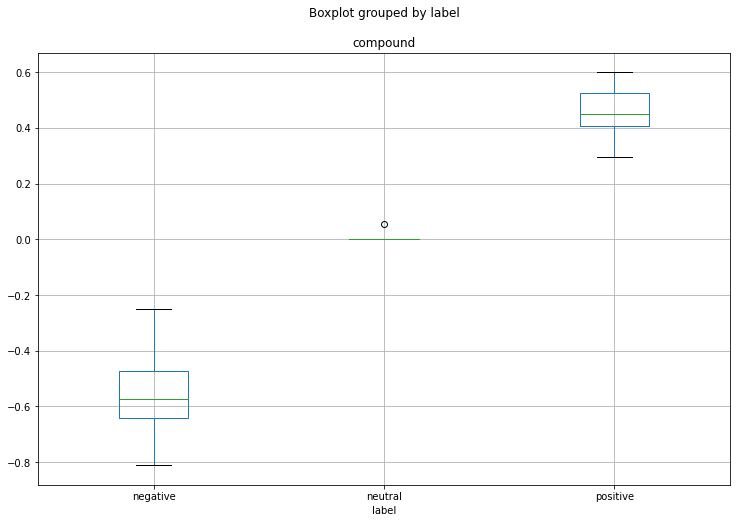

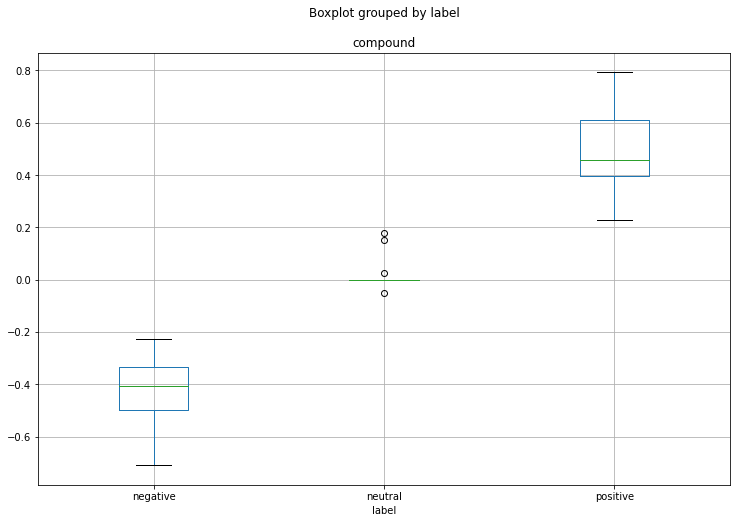

In [12]:
df.boxplot(by='label', column='compound', figsize=(12,8))
df2.boxplot(by='label', column='compound', figsize=(12,8))

We have now displayed a visualization of the findings that we have obtained from the text data, so that you can clearly see the different relationships that each subreddit has alongside food from which we can see that chicago had more variability when it came to negative food whereas UIUC had more variability when it comes to positive food reviews, but overall the opinions in relation to food appear to be relatively similar when we compare both of the cities, as illustrated within the boxplot.